In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import raw data
imdb_df = pd.read_csv('IMDb movies.csv')

/opt/miniconda3/envs/ml_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3173: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
list(imdb_df.columns.values)

['imdb_title_id',
 'title',
 'original_title',
 'year',
 'date_published',
 'genre',
 'duration',
 'country',
 'language',
 'director',
 'writer',
 'production_company',
 'actors',
 'description',
 'avg_vote',
 'votes',
 'budget',
 'usa_gross_income',
 'worlwide_gross_income',
 'metascore',
 'reviews_from_users',
 'reviews_from_critics']

In [4]:
# drop columns
drop_cols = ['title',
             'original_title',
             'country',
             'description',
             'avg_vote','votes',
             'usa_gross_income',
             'metascore',
             'reviews_from_users',
             'reviews_from_critics',
             'director',
             'writer',
             'actors']

imdb_df.drop(columns=drop_cols, axis=1, inplace=True)

# drop rows that contain any NaN
imdb_df.dropna(inplace=True)

In [5]:
imdb_df.dtypes

imdb_title_id            object
year                     object
date_published           object
genre                    object
duration                  int64
language                 object
production_company       object
budget                   object
worlwide_gross_income    object
dtype: object

## Formatting of month and year, and filtering for budget and income requirements

In [6]:
# filtering for films released post 2015
imdb_df[["year"]] = imdb_df[["year"]].apply(pd.to_numeric)
imdb_df = imdb_df[imdb_df['year'] > 2015]

In [7]:
# filtering for films measured in $USD
imdb_df = imdb_df[imdb_df['budget'].str.contains('$', regex=False)]
imdb_df = imdb_df[imdb_df['worlwide_gross_income'].str.contains('$', regex=False)]

In [8]:
# convert 'budget' and 'worlwide_gross_income' columns to integers
imdb_df['budget'] = imdb_df['budget'].str.extract('(\d+)').astype(int)
imdb_df['worlwide_gross_income'] = imdb_df['worlwide_gross_income'].str.extract('(\d+)').astype(int)

## Language

In [9]:
# has film been released in english, chinese or korean. one-hot encoding
imdb_numeric_language_df = imdb_df['language'].str.get_dummies(sep=', ')
imdb_numeric_language_df = imdb_numeric_language_df[['English','Chinese','Mandarin','Cantonese','Korean']]
imdb_numeric_language_df['Chinese'] = imdb_numeric_language_df[['Chinese','Mandarin','Cantonese']].max(axis=1)
imdb_numeric_language_df.drop(columns=['Mandarin','Cantonese'], inplace=True)
imdb_numeric_language_df = imdb_numeric_language_df.add_prefix('LANGUAGE_')
print(imdb_numeric_language_df.sum())

imdb_df = imdb_df.merge(imdb_numeric_language_df, left_index=True, right_index=True)
imdb_df.drop(columns=['language'], inplace=True)
imdb_df.head()

LANGUAGE_English    939
LANGUAGE_Chinese     87
LANGUAGE_Korean      18
dtype: int64


,imdb_title_id,year,date_published,genre,duration,production_company,budget,worlwide_gross_income,LANGUAGE_English,LANGUAGE_Chinese,LANGUAGE_Korean
44619,tt0385887,2019,2019-11-07,"Crime, Drama, Mystery",144,Warner Bros. Pictures,26000000,18477736,1,0,0
46723,tt0437086,2019,2019-02-14,"Action, Adventure, Sci-Fi",122,Twentieth Century Fox,170000000,404852543,1,0,0
47132,tt0448115,2019,2019-04-03,"Action, Adventure, Comedy",132,Warner Bros.,100000000,365971656,1,0,0
47292,tt0451279,2017,2017-06-01,"Action, Adventure, Fantasy",141,Warner Bros.,149000000,821847012,1,1,0
48382,tt0475290,2016,2016-03-10,"Comedy, Drama, Music",106,Universal Pictures,22000000,63647656,1,0,0


## Production Company
#### Top 5 Production companies defined as highest grossers. 20th Century Fox also added in as extra due to high number of films
1) Universal Pictures
2) Warner Bros
3) Columbia Pictures
4) Walt Disney Pictures
5) Marvel Studios
7) 20th Century Fox

In [10]:
# standardise spellings of named production companies of interest
imdb_df.loc[imdb_df['production_company'].str.contains('marvel', case=False), 'production_company'] = 'Marvel Studios'
imdb_df.loc[imdb_df['production_company'].str.contains('columbia', case=False), 'production_company'] = 'Columbia Pictures'
imdb_df.loc[imdb_df['production_company'].str.contains('universal', case=False), 'production_company'] = 'Universal Pictures'
imdb_df.loc[imdb_df['production_company'].str.contains('warner', case=False), 'production_company'] = 'Warner Bros'
imdb_df.loc[imdb_df['production_company'].str.contains('Twentieth', case=False), 'production_company'] = 'Twentieth Century Fox'
imdb_df.loc[imdb_df['production_company'].str.contains('20th', case=False), 'production_company'] = 'Twentieth Century Fox'
imdb_df.loc[imdb_df['production_company'].str.contains('disney', case=False), 'production_company'] = 'Walt Disney Pictures'

imdb_numeric_pc_df = imdb_df['production_company'].str.get_dummies(sep=', ')
imdb_numeric_pc_df = imdb_numeric_pc_df[['Marvel Studios','Columbia Pictures','Universal Pictures','Warner Bros','Twentieth Century Fox','Walt Disney Pictures']]
imdb_numeric_pc_df = imdb_numeric_pc_df.add_prefix('PC_')

imdb_df = imdb_df.merge(imdb_numeric_pc_df, left_index=True, right_index=True)
imdb_df.drop(columns=['production_company'], inplace=True)
imdb_df

,imdb_title_id,year,date_published,genre,duration,budget,worlwide_gross_income,LANGUAGE_English,LANGUAGE_Chinese,LANGUAGE_Korean,PC_Marvel Studios,PC_Columbia Pictures,PC_Universal Pictures,PC_Warner Bros,PC_Twentieth Century Fox,PC_Walt Disney Pictures
44619,tt0385887,2019,2019-11-07,"Crime, Drama, Mystery",144,26000000,18477736,1,0,0,0,0,0,1,0,0
46723,tt0437086,2019,2019-02-14,"Action, Adventure, Sci-Fi",122,170000000,404852543,1,0,0,0,0,0,0,1,0
47132,tt0448115,2019,2019-04-03,"Action, Adventure, Comedy",132,100000000,365971656,1,0,0,0,0,0,1,0,0
47292,tt0451279,2017,2017-06-01,"Action, Adventure, Fantasy",141,149000000,821847012,1,1,0,0,0,0,1,0,0
48382,tt0475290,2016,2016-03-10,"Comedy, Drama, Music",106,22000000,63647656,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85477,tt9448656,2018,2019-04-12,Drama,99,200000,4183,0,0,0,0,0,0,0,0,0
85530,tt9527778,2019,2019-12-20,Comedy,98,950000,965558,0,0,0,0,0,0,0,0,0
85592,tt9611484,2018,2019-05-29,"Drama, History",127,500000,5986,1,0,0,0,0,0,0,0,0
85740,tt9779516,2020,2020-03-19,"Biography, Drama, Music",116,12000000,13681524,1,0,0,0,0,0,0,0,0


## Month published grouped and one-hot encoding

In [11]:
# split out published date column and group by season
date = imdb_df['date_published'].str.split('-', expand=True)
spring = ["01","02","03","04"]
summer = ["05","06","07","08"]
autumn = ["09","10"]
winter = ["11","12"]

date[1] = date[1].replace(spring,'spring',regex=True)
date[1] = date[1].replace(summer,'summer',regex=True)
date[1] = date[1].replace(autumn,'autumn',regex=True)
date[1] = date[1].replace(winter,'winter',regex=True)

imdb_df['date_published'] = date[1]
imdb_df.rename(columns={"date_published": "SEASON_RELEASED"}, inplace=True)
imdb_numeric_season_df = imdb_df['SEASON_RELEASED'].str.get_dummies()
imdb_df = imdb_df.merge(imdb_numeric_season_df, left_index=True, right_index=True)
imdb_df.drop(columns=['SEASON_RELEASED'], inplace=True)
imdb_df

,imdb_title_id,year,genre,duration,budget,worlwide_gross_income,LANGUAGE_English,LANGUAGE_Chinese,LANGUAGE_Korean,PC_Marvel Studios,PC_Columbia Pictures,PC_Universal Pictures,PC_Warner Bros,PC_Twentieth Century Fox,PC_Walt Disney Pictures,autumn,spring,summer,winter
44619,tt0385887,2019,"Crime, Drama, Mystery",144,26000000,18477736,1,0,0,0,0,0,1,0,0,0,0,0,1
46723,tt0437086,2019,"Action, Adventure, Sci-Fi",122,170000000,404852543,1,0,0,0,0,0,0,1,0,0,1,0,0
47132,tt0448115,2019,"Action, Adventure, Comedy",132,100000000,365971656,1,0,0,0,0,0,1,0,0,0,1,0,0
47292,tt0451279,2017,"Action, Adventure, Fantasy",141,149000000,821847012,1,1,0,0,0,0,1,0,0,0,0,1,0
48382,tt0475290,2016,"Comedy, Drama, Music",106,22000000,63647656,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85477,tt9448656,2018,Drama,99,200000,4183,0,0,0,0,0,0,0,0,0,0,1,0,0
85530,tt9527778,2019,Comedy,98,950000,965558,0,0,0,0,0,0,0,0,0,0,0,0,1
85592,tt9611484,2018,"Drama, History",127,500000,5986,1,0,0,0,0,0,0,0,0,0,0,1,0
85740,tt9779516,2020,"Biography, Drama, Music",116,12000000,13681524,1,0,0,0,0,0,0,0,0,0,1,0,0


In [12]:
# year released one-hot encoding
#year = imdb_df['year'].astype(str).replace(' ','')
#year = year.str.get_dummies()
#year = year.add_prefix('YEAR_')
#imdb_df = imdb_df.merge(year, left_index=True, right_index=True)
#imdb_df.drop(columns=['year'], inplace=True)
#imdb_df

## Genres selection and one-hot encoding

In [13]:
# create new genres dataframe and split out by comma seperation
genres_df = imdb_df['genre'].str.split(',', expand=True)
genres_df.rename(columns={0: 'genre_1', 1: 'genre_2', 2: 'genre_3'}, inplace=True)
genres_df['genre_1'] = genres_df['genre_1'].str.strip()
genres_df['genre_2'] = genres_df['genre_2'].str.strip()
genres_df['genre_3'] = genres_df['genre_3'].str.strip()
genres_df

,genre_1,genre_2,genre_3
44619,Crime,Drama,Mystery
46723,Action,Adventure,Sci-Fi
47132,Action,Adventure,Comedy
47292,Action,Adventure,Fantasy
48382,Comedy,Drama,Music
...,...,...,...
85477,Drama,None,None
85530,Comedy,None,None
85592,Drama,History,None
85740,Biography,Drama,Music


In [14]:
# calculate the number of films that fall into each genre
genre_counts = pd.DataFrame(genres_df['genre_1'].value_counts())
genre_counts = genre_counts.merge(pd.DataFrame(genres_df['genre_2'].value_counts()), how='outer', left_index=True, right_index=True)
genre_counts = genre_counts.merge(pd.DataFrame(genres_df['genre_3'].value_counts()), how='outer', left_index=True, right_index=True)
genre_counts['Count']= genre_counts.sum(axis=1)
genre_counts["Percentage"] = (genre_counts["Count"] / genre_counts["Count"].sum() * 100).round(1)
print(genre_counts.sort_values(by=['Percentage'], ascending=False))

# as shown, 95.7% of films are covered by first 14 genres. the final 6 genres are only found in 4.3% of films, so are aggregated to form an 'Other' genre grouping
other = ['Western','Musical','War','Sport','Music','History']
# replace the 4.3% 'other' genres with 'Other' string in the genre column of the main imdb_df
imdb_df["genre"] = imdb_df["genre"].replace(other,'Other',regex=True)

# one-hot encoding of 14 named genres and 'Other' genres
imdb_numeric_genres_df = imdb_df['genre'].str.get_dummies(sep=', ')
imdb_numeric_genres_df = imdb_numeric_genres_df.add_prefix('GENRE_')
imdb_df = imdb_df.merge(imdb_numeric_genres_df, left_index=True, right_index=True)
imdb_df.drop(columns=['genre'], inplace=True)
imdb_df

           genre_1  genre_2  genre_3  Count  Percentage
Drama        184.0    259.0    111.0  554.0        19.8
Action       338.0     20.0      NaN  358.0        12.8
Comedy       207.0     69.0     79.0  355.0        12.7
Adventure     49.0    191.0     16.0  256.0         9.1
Crime         53.0     94.0     38.0  185.0         6.6
Thriller       4.0     61.0    118.0  183.0         6.5
Horror        74.0     51.0     26.0  151.0         5.4
Romance        1.0     52.0     60.0  113.0         4.0
Biography     96.0     11.0      1.0  108.0         3.9
Mystery        1.0     49.0     56.0  106.0         3.8
Fantasy        8.0     29.0     49.0   86.0         3.1
Sci-Fi         1.0     20.0     59.0   80.0         2.9
Animation     80.0      NaN      NaN   80.0         2.9
Family         4.0     23.0     38.0   65.0         2.3
History        NaN     14.0     33.0   47.0         1.7
Sport          NaN      6.0     14.0   20.0         0.7
War            1.0      8.0     11.0   20.0     

,imdb_title_id,year,duration,budget,worlwide_gross_income,LANGUAGE_English,LANGUAGE_Chinese,LANGUAGE_Korean,PC_Marvel Studios,PC_Columbia Pictures,...,GENRE_Crime,GENRE_Drama,GENRE_Family,GENRE_Fantasy,GENRE_Horror,GENRE_Mystery,GENRE_Other,GENRE_Romance,GENRE_Sci-Fi,GENRE_Thriller
44619,tt0385887,2019,144,26000000,18477736,1,0,0,0,0,...,1,1,0,0,0,1,0,0,0,0
46723,tt0437086,2019,122,170000000,404852543,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
47132,tt0448115,2019,132,100000000,365971656,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47292,tt0451279,2017,141,149000000,821847012,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
48382,tt0475290,2016,106,22000000,63647656,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85477,tt9448656,2018,99,200000,4183,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
85530,tt9527778,2019,98,950000,965558,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
85592,tt9611484,2018,127,500000,5986,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
85740,tt9779516,2020,116,12000000,13681524,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


## Film Selections

In [15]:
# get a list of GENRE_ column names to be used to iterate through for selection process. Must remove first n=18 columns as not GENRE related
n = 18
cols = imdb_df.columns.tolist()
del cols[:n]
print(cols)

# m=36 defined as the number of films possible to pick for 15 genre categories to allow for 10,000 pairs
m = 36
genres_films_lst = []
# for each GENRE_ column, select films that are of that genre (i.e. =1)
for col in cols:
    genre_sel = (imdb_df.loc[imdb_df[col] == 1]).head(m)
    
    # genre matrix to assist pairwise comparison and remove duplicate comparisons
    genre_mtx = pd.DataFrame(np.diag(genre_sel["duration"]), columns=genre_sel["imdb_title_id"], index=genre_sel["imdb_title_id"])
    genre_tri = genre_mtx.mask(np.triu(np.ones(genre_mtx.shape)).astype(bool)).stack()
    
    # create and tidy up dataframe indexes
    genre_films = genre_tri.to_frame()
    genre_films.index.names = ['title_x','title_y']
    genre_films = genre_films.reset_index()
    genre_films.drop(columns=[0], axis=1, inplace=True)
    
    # append to genres_films_lst
    genres_films_lst.append(genre_films)

# concatenate list together to form one big dataframe
genres_films = pd.concat(genres_films_lst, ignore_index=True)

# merge in film_x variables
genres_films = genres_films.merge(imdb_df, how='left', left_on='title_x', right_on='imdb_title_id')
# merge in film_y variables
genres_films = genres_films.merge(imdb_df, how='left', left_on='title_y', right_on='imdb_title_id')
genres_films.drop(columns=['imdb_title_id_x','imdb_title_id_y'], axis=1, inplace=True)

# create profit columns
genres_films["profit_x"] = genres_films["worlwide_gross_income_x"] - genres_films["budget_x"]
genres_films["profit_y"] = genres_films["worlwide_gross_income_y"] - genres_films["budget_y"]

# classifying if film_x has made more profit than film_y. 1=yes, 0=no
conditions = [
    (genres_films['profit_x'] > genres_films['profit_y']),
    (genres_films['profit_x'] < genres_films['profit_y']),
    (genres_films['profit_x'] == genres_films['profit_y'])
    ]
     
values = ['1','0','0']
     
genres_films['profit_xy'] = np.select(conditions, values)

genres_films

['GENRE_Action', 'GENRE_Adventure', 'GENRE_Animation', 'GENRE_Biography', 'GENRE_Comedy', 'GENRE_Crime', 'GENRE_Drama', 'GENRE_Family', 'GENRE_Fantasy', 'GENRE_Horror', 'GENRE_Mystery', 'GENRE_Other', 'GENRE_Romance', 'GENRE_Sci-Fi', 'GENRE_Thriller']


,title_x,title_y,year_x,duration_x,budget_x,worlwide_gross_income_x,LANGUAGE_English_x,LANGUAGE_Chinese_x,LANGUAGE_Korean_x,PC_Marvel Studios_x,...,GENRE_Fantasy_y,GENRE_Horror_y,GENRE_Mystery_y,GENRE_Other_y,GENRE_Romance_y,GENRE_Sci-Fi_y,GENRE_Thriller_y,profit_x,profit_y,profit_xy
0,tt0448115,tt0437086,2019,132,100000000,365971656,1,0,0,0,...,0,0,0,0,0,1,0,265971656,234852543,1
1,tt0451279,tt0437086,2017,141,149000000,821847012,1,1,0,0,...,0,0,0,0,0,1,0,672847012,234852543,1
2,tt0451279,tt0448115,2017,141,149000000,821847012,1,1,0,0,...,0,0,0,0,0,0,0,672847012,265971656,1
3,tt0493405,tt0437086,2017,100,25000000,26800152,1,0,0,0,...,0,0,0,0,0,1,0,1800152,234852543,0
4,tt0493405,tt0448115,2017,100,25000000,26800152,1,0,0,0,...,0,0,0,0,0,0,0,1800152,265971656,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,tt2873282,tt2482856,2018,140,69000000,151572634,1,0,0,0,...,0,1,0,0,0,0,1,82572634,-228000,1
9446,tt2873282,tt2492344,2018,140,69000000,151572634,1,0,0,0,...,0,0,0,0,0,1,1,82572634,-1997320,1
9447,tt2873282,tt2531334,2018,140,69000000,151572634,1,0,0,0,...,0,1,1,0,0,0,1,82572634,-4905822,1
9448,tt2873282,tt2674358,2018,140,69000000,151572634,1,0,0,0,...,0,0,0,0,0,0,1,82572634,-27763180,1


# Histogram exports without transformation

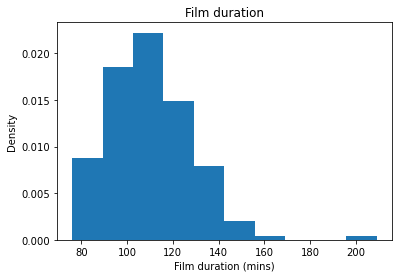

In [25]:
plt.hist(genres_films['duration_x'], density=True)
plt.title("Film duration")
plt.xlabel("Film duration (mins)")
plt.ylabel("Density")
plt.savefig("duration_x.jpg")

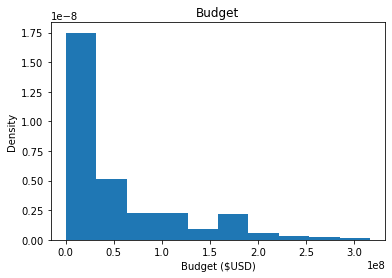

In [28]:
plt.hist(genres_films['budget_x'], density=True)
plt.title("Budget")
plt.xlabel("Budget ($USD)")
plt.ylabel("Density")
plt.savefig("budget_x.jpg")

In [18]:
genres_films.drop(columns=['worlwide_gross_income_x','worlwide_gross_income_y','profit_x','profit_y'], inplace=True)

# Data export

In [19]:
genres_films.to_csv('profit_x_y.csv')

# Move to helper_functions.py

(array([0.28452988, 1.86513522, 1.44252466, 2.62144075, 1.83166111,
        1.23017331, 0.50211156, 0.05648755, 0.        , 0.05125722]),
 array([4.33073334, 4.43189343, 4.53305352, 4.63421361, 4.7353737 ,
        4.8365338 , 4.93769389, 5.03885398, 5.14001407, 5.24117416,
        5.34233425]),
 <BarContainer object of 10 artists>)

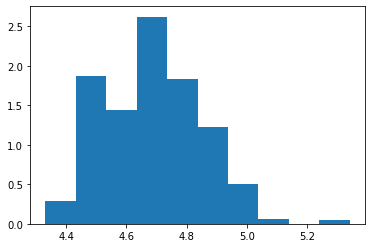

In [133]:
# take logs of budget and duration columns to help reduce skew, particularly relevant for duration. budget is highly non-normal so not a huge effect
genres_films['budget_x_log'] = np.log(genres_films['budget_x'])
genres_films['budget_y_log'] = np.log(genres_films['budget_y'])
genres_films['duration_x_log'] = np.log(genres_films['duration_x'])
genres_films['duration_y_log'] = np.log(genres_films['duration_y'])

plt.hist(genres_films['duration_x_log'], density=True)

In [134]:
genres_films_num = genres_films[["duration_x_log", "budget_x_log", "duration_y_log", "budget_y_log","year_x","year_y"]]
#genres_films_norm = (genres_films_num - genres_films_num.min())/(genres_films_num.max() - genres_films_num.min())
genres_films_norm = (genres_films_num - genres_films_num.mean())/(genres_films_num.std())
genres_films_norm

,duration_x_log,budget_x_log,duration_y_log,budget_y_log
0,1.233861,0.901620,0.668936,1.134223
1,1.648341,1.136439,0.668936,1.134223
2,1.648341,1.136439,1.157200,0.843898
3,-0.510777,0.085305,0.668936,1.134223
4,-0.510777,0.085305,1.157200,0.843898
...,...,...,...,...
9445,1.603615,0.683121,-1.869487,-1.675744
9446,1.603615,0.683121,-1.013266,-1.296500
9447,1.603615,0.683121,-1.285739,-0.795167
9448,1.603615,0.683121,-1.148005,0.147416


 # Add plot exports to main code

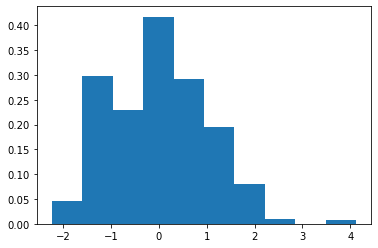

In [135]:
plt.hist(genres_films_norm['duration_x_log'], density=True)
plt.savefig("duration_x_log_standardised.jpg")

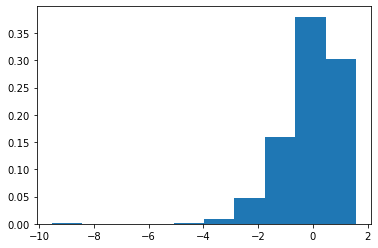

In [137]:
plt.hist(genres_films_norm['budget_x_log'], density=True)
plt.savefig("budget_x_log_standardised.jpg")

In [23]:
#replace columns in original dataset with normalised data
genres_films['duration_x_log'] = genres_films_norm['duration_x_log']
genres_films['budget_x_log'] = genres_films_norm['budget_x_log']
genres_films['duration_y_log'] = genres_films_norm['duration_y_log']
genres_films['budget_y_log'] = genres_films_norm['budget_y_log']

genres_films.drop(columns=['budget_x','budget_y','duration_x','duration_y'], inplace=True)

genres_films

,title_x,title_y,duration_x,budget_x,worlwide_gross_income_x,LANGUAGE_English_x,LANGUAGE_Chinese_x,LANGUAGE_Korean_x,PC_Marvel Studios_x,PC_Columbia Pictures_x,...,GENRE_Fantasy_y,GENRE_Horror_y,GENRE_Mystery_y,GENRE_Other_y,GENRE_Romance_y,GENRE_Sci-Fi_y,GENRE_Thriller_y,profit_x,profit_y,profit_xy
0,tt0448115,tt0437086,0.421053,0.315457,365971656,1,0,0,0,0,...,0,0,0,0,0,1,0,265971656,234852543,1
1,tt0451279,tt0437086,0.488722,0.470032,821847012,1,1,0,0,0,...,0,0,0,0,0,1,0,672847012,234852543,1
2,tt0451279,tt0448115,0.488722,0.470032,821847012,1,1,0,0,0,...,0,0,0,0,0,0,0,672847012,265971656,1
3,tt0493405,tt0437086,0.180451,0.078864,26800152,1,0,0,0,0,...,0,0,0,0,0,1,0,1800152,234852543,0
4,tt0493405,tt0448115,0.180451,0.078864,26800152,1,0,0,0,0,...,0,0,0,0,0,0,0,1800152,265971656,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,tt2873282,tt2482856,0.481203,0.217666,151572634,1,0,0,0,0,...,0,1,0,0,0,0,1,82572634,-228000,1
9446,tt2873282,tt2492344,0.481203,0.217666,151572634,1,0,0,0,0,...,0,0,0,0,0,1,1,82572634,-1997320,1
9447,tt2873282,tt2531334,0.481203,0.217666,151572634,1,0,0,0,0,...,0,1,1,0,0,0,1,82572634,-4905822,1
9448,tt2873282,tt2674358,0.481203,0.217666,151572634,1,0,0,0,0,...,0,0,0,0,0,0,1,82572634,-27763180,1


In [22]:
genres_films.to_csv('profit_x_y_scaling.csv')